In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

d:\Works\Projects\ML\ml-env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**Build CNN Model**

In [6]:
model = keras.Sequential([
    
    # First Convolution Block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Second Convolution Block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Fully Connected Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    # Output Layer
    layers.Dense(10, activation='softmax')
])

d:\Works\Projects\ML\ml-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9264 - loss: 0.2378 - val_accuracy: 0.9791 - val_loss: 0.0728
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9709 - loss: 0.0978 - val_accuracy: 0.9852 - val_loss: 0.0471
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9777 - loss: 0.0739 - val_accuracy: 0.9845 - val_loss: 0.0515
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 104s 89ms/step - accuracy: 0.9809 - loss: 0.0621 - val_accuracy: 0.9882 - val_loss: 0.0395
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9828 - loss: 0.0557 - val_accuracy: 0.9897 - val_loss: 0.0357
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9893 - val_loss: 0.0376
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 91s 92ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9912 - val_loss: 0.0303
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.9866 - loss: 0.0433 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0215
Test Accuracy: 0.9921000003814697


**📊 Plot Accuracy & Loss**

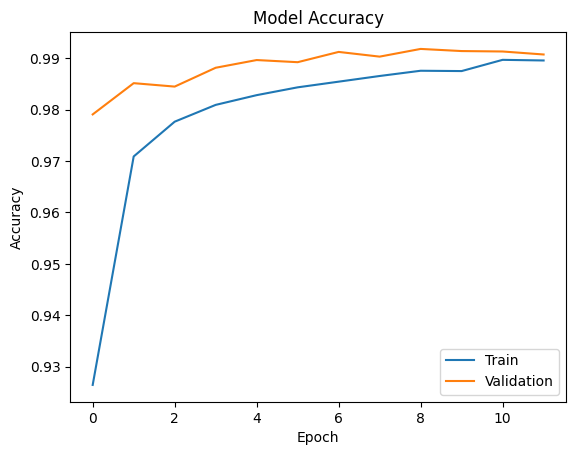

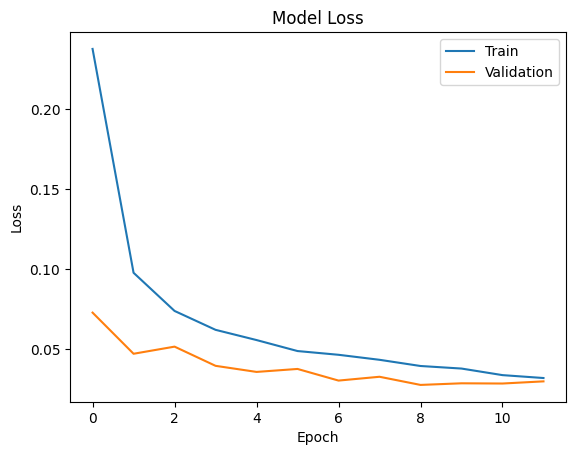

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()